In [1]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [2]:
BVOCs = ['Isoprene']
VOCs = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol', 'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane', 'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene', 'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane']

In [3]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")

In [4]:
datajh .columns

Index(['Time', 'TVOC浓度', '甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度',
       '甲硫醚、乙硫醇浓度', '氯乙烷浓度', '异戊二烯浓度',
       ...
       '地面层温度', '地面层湿度', '风速', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month',
       'Day', 'Datetime', 'seconds'],
      dtype='object', length=103)

In [5]:
columns_to_keep = ['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度',
                   '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度', '二甲基甲酰胺浓度', '甲酸乙酯浓度',
                   '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度',
                   '乙硫醚、丁硫醇浓度',
                   '甲苯浓度', '苯胺浓度', '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度',
                   '三乙胺浓度',
                   '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度', '1,3-二氯丙烯浓度',
                   '正辛烷浓度',
                   '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度',
                   '磷酸三甲酯浓度',
                   '正癸醇浓度', '二氯苯浓度', '二乙基苯胺浓度', '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度',
                   '二溴甲烷浓度',
                   '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度', 'Hour']

# Keep only the specified columns and merge the data
data = pd.concat([datajh[columns_to_keep], datacm[columns_to_keep]], axis=0)
data.columns = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol', 'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane', 'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene', 'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', 'Hour']
data=data[(data['Hour'] >= 6) & (data['Hour'] <= 18)]
data=data.groupby('Hour').mean()


In [6]:
datarB=data[BVOCs]
datarB.columns=BVOCs
datarB=datarB.mean()
datarV=data[VOCs]
datarV.columns=VOCs
datarV=datarV.mean()

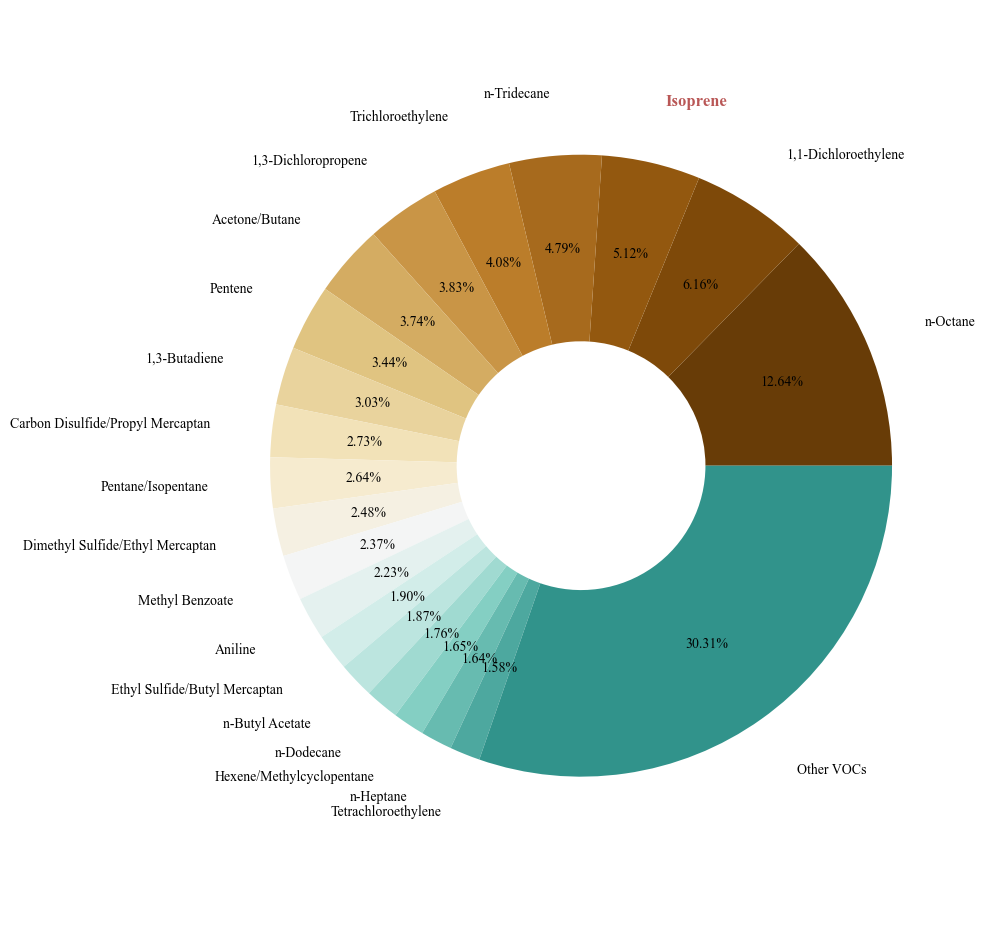

In [7]:
from matplotlib import font_manager as fm

# 创建一个3行4列的子图布局
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

labels = datarV.sort_values(ascending=False).index
sizes = datarV.sort_values(ascending=False)*100

top_n = 20
sizes_top = sizes[:top_n].tolist()
sizes_top.append(sizes[top_n:].sum())

# 对应地修改labels
labels_top = labels[:top_n].tolist()
labels_top.append('Other VOCs')



ax1 = axes
ax2 = ax1.twinx()  # 创建一个共享同一个x轴的新轴


startangle = -np.argmax(sizes) * 360.0 / len(sizes_top)
colors = sns.color_palette(palette='BrBG',n_colors=top_n+5)
patches, texts, autotexts = ax1.pie(sizes_top, labels=labels_top, autopct='%1.2f%%',
        shadow=False, startangle=startangle, colors=colors, labeldistance=1.2,pctdistance=0.7, radius=0.4,wedgeprops=dict(width=0.24))
# labeldistance: 控制labels显示的位置
# pctdistance: 控制百分比显示的位置
# radius: 控制切片突出的距离

ax1.axis('equal')

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size("medium")
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
ax1.set_title("",y=0.2,fontsize=13)
# ax2 只显示图例（legend）
ax2.axis('off')
# ax1.legend(patches, labels_top, bbox_to_anchor=(1.3,0.6), frameon=False,fontsize=10)

for text in texts:
    if text.get_text() in BVOCs:
        text.set_color('#B95756')
        text.set_fontsize(12)
        text.set_weight('bold')

# plt.subplots_adjust(hspace=0,wspace=5)
fig.tight_layout()
fig.savefig('VOCs占比.svg', bbox_inches='tight')
plt.show()

In [8]:
from palettable.tableau import Tableau_20
colors = Tableau_20.mpl_colors

In [9]:
from palettable.mycarta import Cube1_14
from itertools import cycle
# 获取 Cube1_14 调色板的颜色列表
colors2 = Cube1_14.mpl_colors
# 扩展到 35 种颜色
# 使用 cycle() 循环颜色，直到达到 35 个颜色
extended_colors = [color for color, _ in zip(cycle(colors2), range(35))]

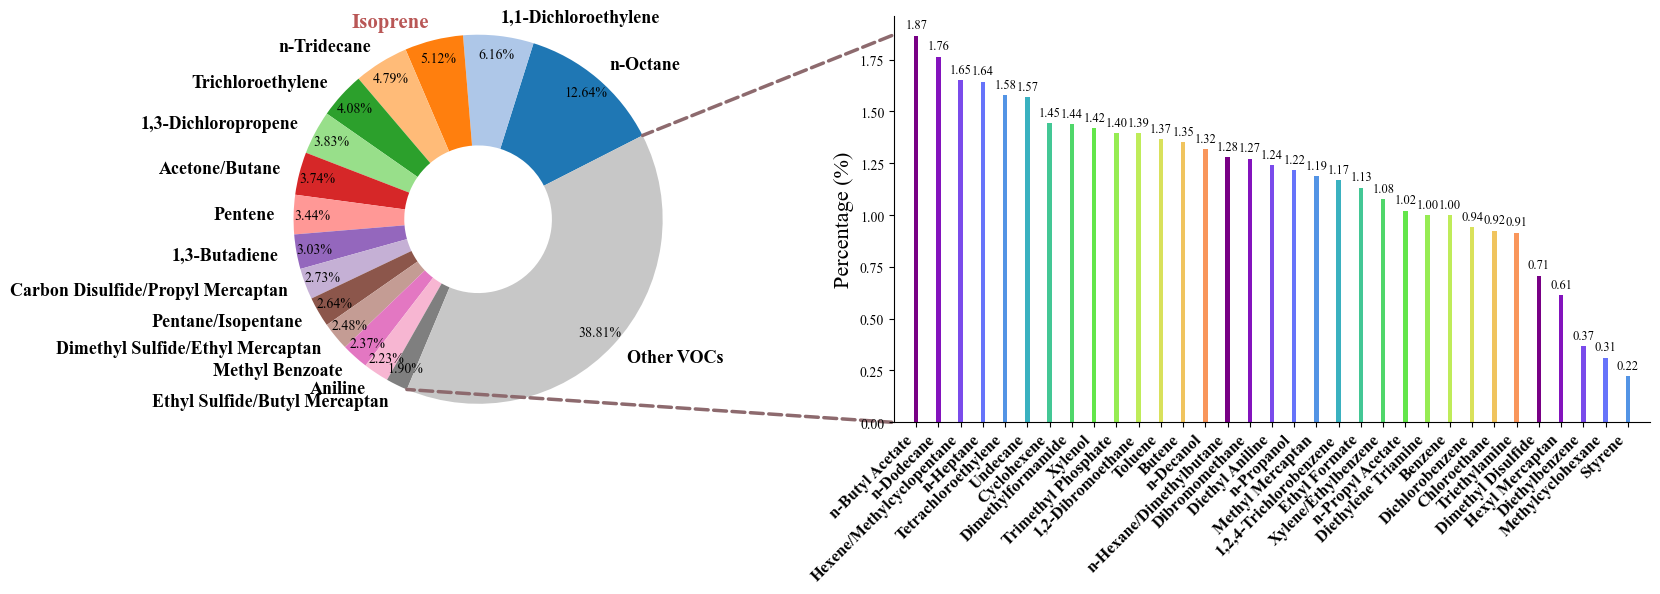

In [10]:

from matplotlib.patches import ConnectionPatch

# Sort the data
sorted_datarV = (datarV / datarV.sum()).sort_values(ascending=False)
labels = sorted_datarV.index
sizes = sorted_datarV * 100

top_n = 15
sizes_top = sizes[:top_n].tolist()
if len(sizes) > top_n:
    sizes_top.append(sizes[top_n:].sum())

# Modify labels accordingly
labels_top = labels[:top_n].tolist()
if len(labels) > top_n:
    labels_top.append('Other VOCs')

# Extracting the data for "Other VOCs" for the bar chart
sizes_other = sizes[top_n:].tolist()
labels_other = labels[top_n:].tolist()

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
fig.subplots_adjust(wspace=0.05,bottom=0.3)  # Adjusting the space between the two plots

# Create the pie chart
startangle = 27
colors = sns.color_palette(palette=colors, n_colors=min(top_n+1, len(sizes_top))+4)
patches, texts, autotexts = ax1.pie(sizes_top, labels=labels_top, autopct='%1.2f%%',
                                    shadow=False, startangle=startangle, colors=colors,
                                    labeldistance=1.1, pctdistance=0.9, radius=0.4, wedgeprops=dict(width=0.24))

ax1.axis('equal')

# Set font size for pie chart
proptease = fm.FontProperties()
proptease.set_size("medium")
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)


for text in texts:
    text.set_fontsize(13)
    text.set_weight('bold')
    
for text in texts:
    if text.get_text() in BVOCs:
        text.set_color('#B95756')
        text.set_fontsize(15)
        text.set_weight('bold')

# Create the bar chart for "Other VOCs"
width = .2
colors_other = sns.color_palette(palette=extended_colors, n_colors=len(sizes_other))
for j, (height, label) in enumerate(zip(sizes_other, labels_other)):
    bc = ax2.bar(j, height, width, color=colors_other[j])
    ax2.bar_label(bc, labels=[f"{height:.2f}"], label_type='edge',fontsize=9, padding=3)

ax2.set_title('')
ax2.set_xticks(range(len(labels_other)))
ax2.set_xticklabels(labels_other, rotation=45, ha="right", fontsize=7)
ax2.set_ylabel('Percentage (%)',fontsize=16)
ax2.set_xlim(-1, len(labels_other))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

xticks = ax2.get_xticklabels()
for label in xticks:
    if label.get_text() in BVOCs:
        label.set_color('#B95756')
        label.set_fontsize(14)
        label.set_weight('bold')
        
for label in xticks:
    label.set_fontsize(12)
    label.set_weight('bold')


# Use ConnectionPatch to draw lines between the two plots
theta1, theta2 = patches[-1].theta1, patches[-1].theta2
center, r = patches[-1].center, patches[-1].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2-1, max(sizes_other)), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linestyle('--')
con.set_linewidth(2.5)
con.set_edgecolor('#8D6A6E')
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2-1, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
ax2.grid(False)
con.set_linestyle('--')
con.set_linewidth(2.5)
con.set_edgecolor('#8D6A6E')

# plt.tight_layout()

plt.savefig('VOCs占比2.svg', bbox_inches='tight')
plt.show()